# Data Sampling with Test Train Split


## The Problem with Random Sampling

Consider this example. You have 5 red balls, 2 green balls and 3 blue balls. If you wanted a fair representation of the population of the 10 balls from 5 samples, you would expect to have 1/2 to red, 1/5 to be green, and the remaining to be blue. With random sampling without replacement, this what we generally get in the long term. In the immediate term, however this is not guareenteed.

Introduce stratified sampling. In stratified sampling the population into homogenious subgroups called stravata, and the from each strata - the right number of instacne is sampling in order to _guarentee_ (key word here) that the samples are representative of the entire population.

In our case, our strata would be: red, green, blue. And from each strata would would randomly sample the following if we wanted to ensure that we sample at least $\leq 5$ balls.

$
\text{red: }  \lfloor 5/10*5 \rfloor = 2 \\
\text{green: }\lfloor 2/10*5 \rfloor = 1 \\
\text{blue: } \lfloor 3/10*5 \rfloor = 1 \\
$

**What About Numerical Attributes?**

In this case, we could _bin_ or _discretize_ the numerical data into groups and then stratify each group. We can do this for attributes that we know are particularly important, and will therefore want to make sure the attribute is well represented. There are a couple of strategies for doing this one way is the following:



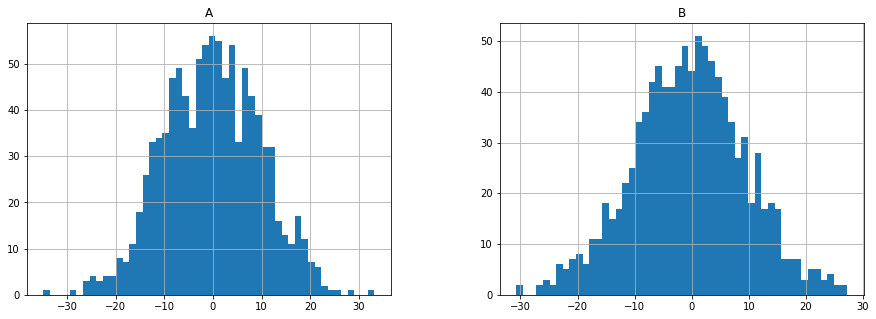

In [47]:
import matplotlib.pyplot as plt
import pandas as pd


normal_matrix = np.random.normal(0, 10, (1000, 2))
sample_df = pd.DataFrame(normal_matrix, columns=['A', 'B'])
sample_df.hist(bins=50, figsize=(15,5))
plt.show()

In [81]:
# now in a similiar way we have discritized the values into bins, we can create a new column of data
# that mocks this is a perminate way

# ensure to ceil to discritize float
sample_df['C'] = np.ceil(sample_df['B'] / 4)
sample_df.head(3)

,A,B,C
0,6.868593,-11.303856,-2.0
1,-1.278019,8.378370,3.0
2,-10.771069,-9.245524,-2.0


In [82]:
# possible numerical categorics now include
print(list(set(sample_df['C'].tolist())))

[-0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, -1.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0]


One thing we want to prove by example is that stratified sampling represents the population better and with less error when compared to random sampling. To do this, we compare the stratified and random sampled proportion to true proportion of in the samplied category field.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


# random sampling
train_set_rand, test_set_rand = train_test_split(sample_df, test_size=0.2, random_state=42)

# stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(sample_df, sample_df['C']):
    train_set_strat, test_set_strat = sample_df.loc[train_index], sample_df.loc[test_index]

# build the revealing the results
compare_props = pd.DataFrame({
    "true": sample_df['C'].value_counts() / len(sample_df),
    "stratified": test_set_strat['C'].value_counts() / len(sample_df),
    "random": test_set_rand['C'].value_counts() / len(sample_df)
}).sort_index()

compare_props["random_error"] = abs(compare_props['random'] - compare_props['true'])
compare_props["statified_error"] = abs(compare_props['stratified'] - compare_props['true'])
compare_props

,true,stratified,random,random_error,statified_error
-7.0,0.002,NaN,NaN,NaN,NaN
-6.0,0.007,0.002,0.002,0.005,0.005
-5.0,0.020,0.004,0.006,0.014,0.016
-4.0,0.032,0.006,0.010,0.022,0.026
-3.0,0.055,0.011,0.010,0.045,0.044
-2.0,0.100,0.020,0.019,0.081,0.080
-1.0,0.146,0.029,0.034,0.112,0.117
-0.0,0.147,0.030,0.026,0.121,0.117
1.0,0.170,0.034,0.024,0.146,0.136
2.0,0.128,0.026,0.029,0.099,0.102


In [84]:
total_error_random, total_error_statified = compare_props['random_error'].sum(), compare_props['statified_error'].sum()
print('total_error_random', total_error_random)
print('total_error_statified', total_error_statified)

total_error_random 0.798
total_error_statified 0.7979999999999999



**Implementation Challenges**

If we have a small dataset which catagorical variables, this would be a thing to keep in mind. Another challenge to keep in mind is, random seeding in the context where the dataset can grow. Here, we would only want the new data to be assigned randomly, while the earlier data is seeded in the same way. 
